## ML Project Clustering

Dataset Link
https://drive.google.com/file/d/1pP0Rr83ri0voscgr95-YnVCBv6BYV22w/view

Hint:

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv('D:\iNeuron\17Machine Learning Module 4\data_stocks.csv')

data.head()

Problem 1:

There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance.

Problem 2:

How many Unique patterns that exist in the historical stock data set, based on fluctuations in price?

Problem 3:

Identify which all stocks are moving together and which all stocks are different from each other.

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('D:/iNeuron/17Machine Learning Module 4/data_stocks.csv')
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [2]:
data.shape

(41266, 502)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [4]:
## Let us capture all the nan values

features_nan = [feature for feature in data.columns if data[feature].isnull().sum() > 1]

for feature in features_nan:
    print("{}: {}% missing values".format(feature, np.round(data[feature].isnull().mean(), 4)*100))

In [5]:
features_nan

[]

There are no null values present in the stocks dataset

#### Problem 1 : Which all stocks are apparently similar in performance.

In [6]:
# Finding correlation between variables - identify highly correlated variables
data_cor = data.drop(['DATE','SP500'], axis=1)
cor = data_cor.corr()
cor.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,...,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AAPL,0.082065,1.000000,0.714578,0.264269,0.265641,0.645233,-0.712522,0.326712,0.545541,-0.238091,...,0.306664,-0.250959,0.738655,0.266994,-0.671488,0.341687,0.693062,0.627531,-0.580055,0.442600
NASDAQ.ADBE,0.542213,0.714578,1.000000,0.259282,0.476496,0.872353,-0.759604,0.488717,0.733609,0.201821,...,0.718851,-0.792876,0.850709,0.722161,-0.758967,0.806615,0.911106,0.939185,-0.067235,0.776052
NASDAQ.ADI,0.209446,0.264269,0.259282,1.000000,-0.085074,0.470756,-0.323603,-0.409747,0.504019,0.042083,...,0.203224,-0.160317,0.308948,0.050697,-0.024428,-0.017967,0.067258,0.261173,0.130786,0.351893
NASDAQ.ADP,0.245801,0.265641,0.476496,-0.085074,1.000000,0.325630,-0.229119,0.572143,0.099934,0.447506,...,0.321414,-0.438662,0.443773,0.347293,-0.463670,0.589464,0.634191,0.418591,-0.201805,0.160213


In [7]:
cor.shape

(500, 500)

In [8]:
cor.loc[cor['NASDAQ.AAL'] >= 0.70 , cor['NASDAQ.AAL'] >= 0.70 ]

,NASDAQ.AAL,NASDAQ.AMZN,NASDAQ.EXPE,NASDAQ.FISV,NASDAQ.HAS,NASDAQ.HSIC,NASDAQ.NWS,NASDAQ.NWSA,NASDAQ.PCLN,NASDAQ.REGN,...,NYSE.SHW,NYSE.SWK,NYSE.SYK,NYSE.TDG,NYSE.TEL,NYSE.VAR,NYSE.WRK,NYSE.WYN,NYSE.XL,NYSE.ZTS
NASDAQ.AAL,1.000000,0.803319,0.812206,0.765441,0.832713,0.743241,0.746688,0.735056,0.722392,0.745415,...,0.772367,0.832323,0.752165,0.762143,0.818392,0.717439,0.836602,0.798624,0.810955,0.753567
NASDAQ.AMZN,0.803319,1.000000,0.906601,0.912265,0.691795,0.782487,0.773627,0.773584,0.776861,0.882363,...,0.777930,0.756152,0.848922,0.848599,0.883124,0.796943,0.810428,0.879967,0.804398,0.872246
NASDAQ.EXPE,0.812206,0.906601,1.000000,0.906743,0.651120,0.697821,0.808736,0.811687,0.762869,0.926762,...,0.830868,0.836582,0.858145,0.913565,0.898159,0.824378,0.873718,0.931258,0.859042,0.913009
NASDAQ.FISV,0.765441,0.912265,0.906743,1.000000,0.629642,0.706432,0.842286,0.846850,0.708229,0.855713,...,0.761536,0.745245,0.897540,0.905529,0.900449,0.774940,0.824746,0.915719,0.792480,0.883346
NASDAQ.HAS,0.832713,0.691795,0.651120,0.629642,1.000000,0.873725,0.574926,0.551673,0.551485,0.649089,...,0.822512,0.765369,0.485755,0.501079,0.634677,0.676587,0.717739,0.698866,0.625126,0.651842
NASDAQ.HSIC,0.743241,0.782487,0.697821,0.706432,0.873725,1.000000,0.574447,0.563462,0.607436,0.682950,...,0.787478,0.630234,0.527945,0.540185,0.626301,0.658248,0.628135,0.756524,0.582622,0.738266
NASDAQ.NWS,0.746688,0.773627,0.808736,0.842286,0.574926,0.574447,1.000000,0.996612,0.744886,0.752504,...,0.619777,0.679304,0.845778,0.846448,0.845113,0.643053,0.792725,0.786987,0.740466,0.706562
NASDAQ.NWSA,0.735056,0.773584,0.811687,0.846850,0.551673,0.563462,0.996612,1.000000,0.759936,0.746106,...,0.615533,0.677645,0.852176,0.853370,0.852278,0.629053,0.792363,0.795555,0.740233,0.707875
NASDAQ.PCLN,0.722392,0.776861,0.762869,0.708229,0.551485,0.607436,0.744886,0.759936,1.000000,0.618160,...,0.555700,0.692384,0.739113,0.732397,0.771626,0.447562,0.730380,0.730770,0.749809,0.574312
NASDAQ.REGN,0.745415,0.882363,0.926762,0.855713,0.649089,0.682950,0.752504,0.746106,0.618160,1.000000,...,0.834929,0.806024,0.791365,0.842820,0.842599,0.924674,0.815462,0.856140,0.782271,0.936588


#### Problem 2 : How many Unique patterns that exist in the historical stock data set, based on fluctuations in price?

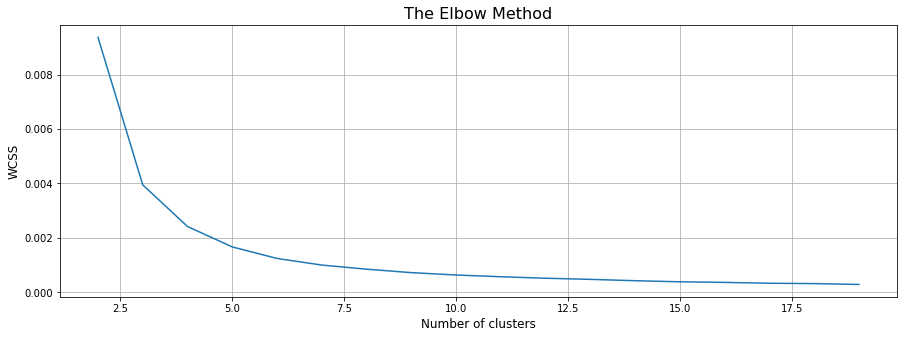

In [9]:
# We will try to find the optimal number of clusters and assign each stock to a specific cluster
# Calculate the average annual percentage return and volatilities over a theoritical one year period

from sklearn.cluster import KMeans

returns = data.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = data.pct_change().std()*np.sqrt(252)

# elbow method
X = returns
wcss = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (15, 5))
plt.plot(range(2, 20), wcss)
plt.grid(True)
plt.title('The Elbow Method', fontsize=16)
plt.xlabel('Number of clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.show()

From the above Elbow curve we see that the number of clusters can be choosen as 5 or 6.

In [10]:
# Fitting K-Means to the dataset using k = 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([4, 4, 3, 0, 0, 0, 0, 3, 3, 3, 3, 2, 4, 0, 0, 0, 3, 0, 3, 4, 0, 0,
       0, 3, 0, 0, 4, 0, 0, 0, 0, 4, 0, 3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0,
       3, 0, 3, 4, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 2, 4, 4,
       0, 0, 0, 4, 3, 0, 3, 0, 3, 0, 4, 0, 4, 3, 3, 3, 4, 3, 0, 0, 2, 2,
       0, 3, 4, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 3, 0, 2, 0, 3, 3, 0,
       3, 4, 3, 3, 0, 0, 2, 0, 3, 2, 0, 3, 0, 0, 3, 0, 2, 4, 3, 4, 4, 0,
       3, 4, 4, 0, 4, 4, 0, 4, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, 3, 0, 4,
       3, 3, 4, 4, 4, 3, 4, 4, 4, 4, 2, 3, 4, 0, 4, 0, 3, 3, 0, 0, 0, 2,
       4, 4, 2, 0, 4, 4, 3, 0, 0, 0, 3, 0, 4, 0, 0, 4, 4, 3, 3, 4, 2, 4,
       4, 4, 3, 3, 0, 4, 0, 4, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 4, 4, 3,
       4, 0, 4, 0, 0, 3, 4, 0, 4, 4, 3, 0, 0, 4, 4, 0, 4, 4, 0, 3, 0, 4,
       4, 0, 4, 0, 0, 0, 0, 4, 3, 4, 0, 0, 4, 3, 0, 4, 0, 0, 4, 2, 4, 4,
       4, 2, 3, 3, 0, 0, 3, 4, 4, 0, 3, 4, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0,
       4, 0, 4, 3, 4, 3, 4, 3, 0, 0, 3, 0, 4, 0, 4,

In [11]:
kmeans.cluster_centers_

array([[ 0.00026674,  0.01061037],
       [ 0.01895054,  0.23473517],
       [-0.00062453,  0.02304617],
       [-0.00036302,  0.01511652],
       [ 0.00040265,  0.0073187 ]])

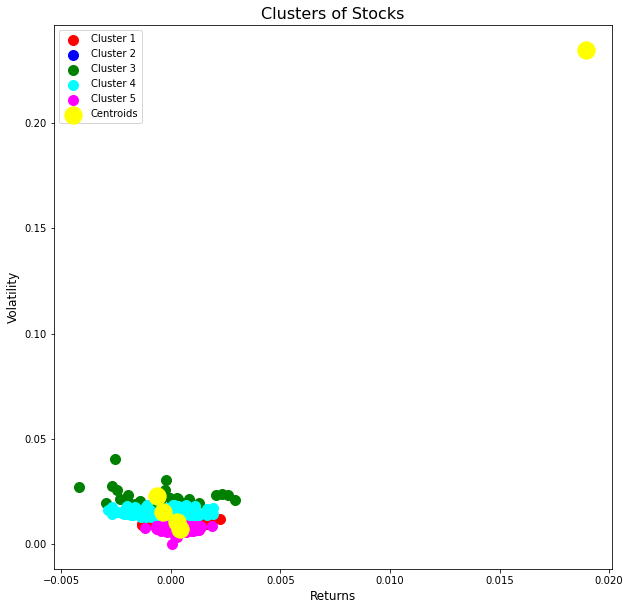

In [12]:
# Visualising the clusters
plt.figure(figsize = (10, 10))
plt.scatter(X[y_kmeans == 0]['Returns'], X[y_kmeans == 0]['Volatility'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['Returns'], X[y_kmeans == 1]['Volatility'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['Returns'], X[y_kmeans == 2]['Volatility'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['Returns'], X[y_kmeans == 3]['Volatility'], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['Returns'], X[y_kmeans == 4]['Volatility'], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Stocks', fontsize=16)
plt.xlabel('Returns', fontsize=12)
plt.ylabel('Volatility', fontsize=12)
plt.legend()
plt.show()

Ok, so it looks like we have an outlier in the data which is skewing the results and making it difficult to actually see what is going on for all the other stocks. Let’s take the easy route and just delete the outlier from our data set and run K-Means clustering again.

In [13]:
#identify the outlier
returns.idxmax()

Returns       NYSE.XRX
Volatility    NYSE.XRX
dtype: object

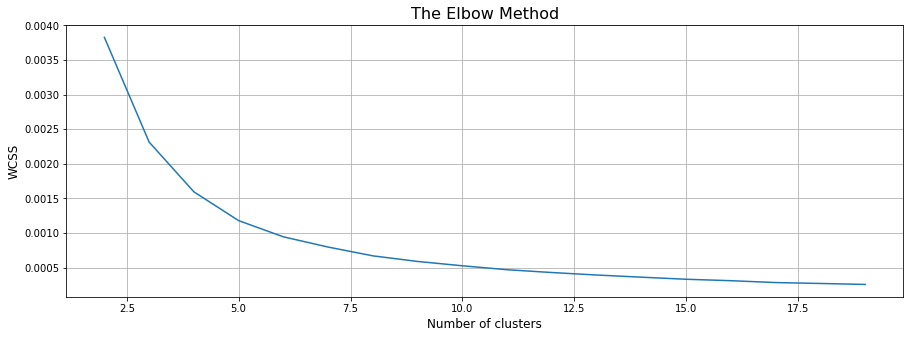

In [14]:
#drop the relevant stocks from our data
df = data.drop(['NYSE.XRX', 'DATE', 'SP500'], axis=1)
returns = df.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = df.pct_change().std()*np.sqrt(252)

# elbow method
X = returns
wcss = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (15, 5))
plt.plot(range(2, 20), wcss)
plt.grid(True)
plt.title('The Elbow Method', fontsize=16)
plt.xlabel('Number of clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.show()

From the above Elbow curve we see that the number of clusters can be choosen as 5 or 6.

In [15]:
# Fitting K-Means to the dataset using k = 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 4, 4, 2, 4, 3, 2, 3, 2, 1, 0, 4, 2, 2, 2, 4, 2, 0, 4, 4, 4, 2,
       4, 4, 0, 4, 4, 4, 4, 0, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4,
       2, 0, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 2, 3, 0, 0, 4, 4,
       4, 0, 2, 4, 2, 4, 2, 4, 0, 4, 0, 3, 2, 2, 0, 2, 2, 4, 3, 3, 2, 3,
       0, 4, 4, 4, 2, 4, 4, 2, 3, 2, 4, 3, 4, 3, 4, 3, 2, 2, 3, 4, 2, 4,
       2, 2, 4, 4, 3, 4, 2, 3, 4, 2, 4, 4, 2, 4, 3, 0, 2, 0, 0, 4, 2, 0,
       0, 4, 0, 0, 4, 0, 4, 4, 0, 4, 2, 0, 4, 0, 2, 4, 4, 2, 4, 0, 2, 2,
       0, 0, 0, 3, 0, 0, 0, 0, 3, 2, 0, 2, 0, 4, 3, 2, 4, 4, 2, 1, 0, 4,
       1, 4, 0, 0, 2, 4, 4, 4, 2, 4, 0, 4, 4, 0, 0, 3, 2, 0, 1, 0, 0, 0,
       2, 2, 4, 0, 4, 0, 4, 2, 2, 4, 4, 4, 3, 4, 4, 4, 2, 0, 0, 2, 0, 4,
       0, 4, 4, 2, 0, 4, 0, 0, 2, 4, 4, 0, 0, 4, 0, 0, 4, 3, 4, 0, 0, 4,
       0, 4, 4, 4, 4, 0, 2, 0, 4, 4, 0, 2, 2, 0, 4, 4, 0, 3, 0, 4, 0, 1,
       2, 2, 2, 4, 2, 0, 0, 4, 2, 0, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 0, 4,
       0, 3, 0, 2, 0, 3, 4, 4, 2, 4, 0, 4, 0, 4, 0,

In [16]:
kmeans.cluster_centers_

array([[ 0.0004058 ,  0.0073725 ],
       [-0.0020537 ,  0.02960109],
       [-0.0002378 ,  0.01405525],
       [-0.00025501,  0.01916457],
       [ 0.00026084,  0.0103863 ]])

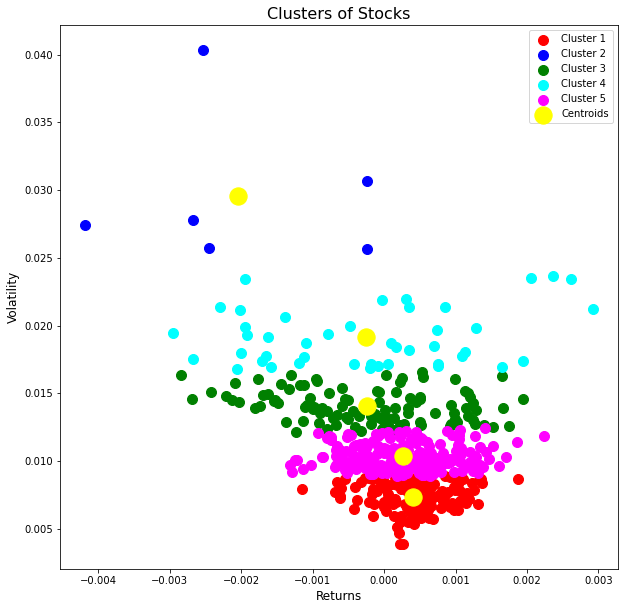

In [17]:
# Visualising the clusters
plt.figure(figsize = (10, 10))
plt.scatter(X[y_kmeans == 0]['Returns'], X[y_kmeans == 0]['Volatility'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['Returns'], X[y_kmeans == 1]['Volatility'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['Returns'], X[y_kmeans == 2]['Volatility'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['Returns'], X[y_kmeans == 3]['Volatility'], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['Returns'], X[y_kmeans == 4]['Volatility'], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Stocks', fontsize=16)
plt.xlabel('Returns', fontsize=12)
plt.ylabel('Volatility', fontsize=12)
plt.legend()
plt.show()

Finally to get the details of which stock is actually in which cluster we can run the following line of code to carry out a list comprehension to create a list of tuples in the (Stock Name, Cluster Number) format.

In [18]:
details = [(name, cluster) for name, cluster in zip(returns.index, y_kmeans)]

So, now we have a list of each of the stocks in the S&P 500, along with which one of 5 clusters they belong to, with the stocks being defined by their return and volatility characteristics.

In [19]:
df = pd.DataFrame(details, columns=['Stock_Name','Cluster_No'])
df.Cluster_No.value_counts()

4    198
0    145
2    106
3     44
1      6
Name: Cluster_No, dtype: int64

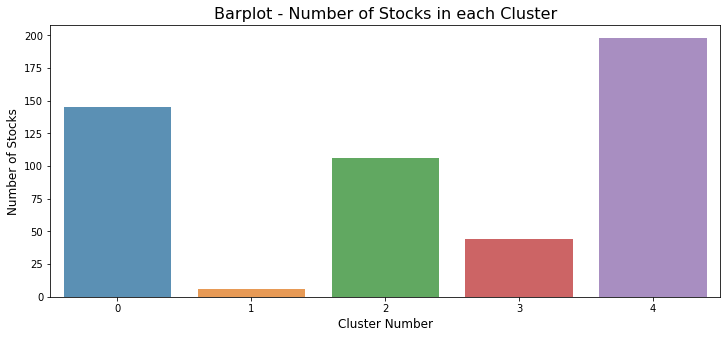

In [20]:
import seaborn as sns
ind = df.Cluster_No.value_counts()
plt.figure(figsize = (12, 5))
sns.barplot(x=ind.index, y=ind.values, alpha=0.8)
plt.ylabel('Number of Stocks', fontsize=12)
plt.xlabel('Cluster Number', fontsize=12)
plt.title('Barplot - Number of Stocks in each Cluster', fontsize =16)
plt.show()

#### Problem 3 : Identify which all stocks are moving together and which all stocks are different from each other.

In [21]:
df.groupby('Cluster_No').describe()

Stock_Name                      
                count unique       top freq
Cluster_No                                 
0                 145    145  NYSE.VTR    1
1                   6      6  NYSE.BLL    1
2                 106    106  NYSE.GPS    1
3                  44     44  NYSE.NFX    1
4                 198    198   NYSE.PH    1

In [22]:
df.loc[df['Cluster_No'] == 0, 'Stock_Name'].values

array(['NASDAQ.AMGN', 'NASDAQ.CBOE', 'NASDAQ.CME', 'NASDAQ.CTSH',
       'NASDAQ.FISV', 'NASDAQ.INFO', 'NASDAQ.INTC', 'NASDAQ.KHC',
       'NASDAQ.MDLZ', 'NASDAQ.MSFT', 'NASDAQ.NDAQ', 'NASDAQ.PAYX',
       'NYSE.ABBV', 'NYSE.ABT', 'NYSE.ACN', 'NYSE.AEE', 'NYSE.AEP',
       'NYSE.AET', 'NYSE.AFL', 'NYSE.AIG', 'NYSE.AJG', 'NYSE.ALL',
       'NYSE.AME', 'NYSE.AON', 'NYSE.APD', 'NYSE.APH', 'NYSE.ARE',
       'NYSE.AVB', 'NYSE.AVY', 'NYSE.AWK', 'NYSE.AXP', 'NYSE.BA',
       'NYSE.BAX', 'NYSE.BK', 'NYSE.BRK.B', 'NYSE.BSX', 'NYSE.CB',
       'NYSE.CCI', 'NYSE.CCL', 'NYSE.CHD', 'NYSE.CI', 'NYSE.CL',
       'NYSE.CLX', 'NYSE.CMS', 'NYSE.CNP', 'NYSE.CVS', 'NYSE.CVX',
       'NYSE.D', 'NYSE.DD', 'NYSE.DGX', 'NYSE.DHR', 'NYSE.DIS',
       'NYSE.DOW', 'NYSE.DPS', 'NYSE.DTE', 'NYSE.DUK', 'NYSE.ECL',
       'NYSE.ED', 'NYSE.EIX', 'NYSE.EQR', 'NYSE.ES', 'NYSE.ETR',
       'NYSE.EXC', 'NYSE.FBHS', 'NYSE.FDX', 'NYSE.FIS', 'NYSE.FTV',
       'NYSE.GD', 'NYSE.GIS', 'NYSE.HCN', 'NYSE.HD', 'NYSE.HIG',
     

In [23]:
df.loc[df['Cluster_No'] == 1, 'Stock_Name'].values

array(['NASDAQ.AMD', 'NYSE.BHI', 'NYSE.BLL', 'NYSE.CHK', 'NYSE.FL',
       'NYSE.SIG'], dtype=object)

In [24]:
df.loc[df['Cluster_No'] == 2, 'Stock_Name'].values

array(['NASDAQ.AAL', 'NASDAQ.ADI', 'NASDAQ.AKAM', 'NASDAQ.AMAT',
       'NASDAQ.ATVI', 'NASDAQ.AVGO', 'NASDAQ.BBBY', 'NASDAQ.CA',
       'NASDAQ.CHTR', 'NASDAQ.CTXS', 'NASDAQ.DISCA', 'NASDAQ.DISCK',
       'NASDAQ.DISH', 'NASDAQ.DLTR', 'NASDAQ.EA', 'NASDAQ.ESRX',
       'NASDAQ.FAST', 'NASDAQ.FFIV', 'NASDAQ.FITB', 'NASDAQ.FOXA',
       'NASDAQ.GT', 'NASDAQ.HBAN', 'NASDAQ.ILMN', 'NASDAQ.KLAC',
       'NASDAQ.LRCX', 'NASDAQ.MAT', 'NASDAQ.MYL', 'NASDAQ.NAVI',
       'NASDAQ.NFLX', 'NASDAQ.NTAP', 'NASDAQ.NWSA', 'NASDAQ.PDCO',
       'NASDAQ.QRVO', 'NASDAQ.ROST', 'NASDAQ.SWKS', 'NASDAQ.SYMC',
       'NASDAQ.TSCO', 'NASDAQ.ULTA', 'NASDAQ.VIAB', 'NASDAQ.WDC',
       'NASDAQ.WYNN', 'NASDAQ.ZION', 'NYSE.ABC', 'NYSE.ADS', 'NYSE.ALK',
       'NYSE.AMG', 'NYSE.AN', 'NYSE.APA', 'NYSE.APC', 'NYSE.AZO',
       'NYSE.BAC', 'NYSE.BCR', 'NYSE.BF.B', 'NYSE.BWA', 'NYSE.CAH',
       'NYSE.CFG', 'NYSE.CMA', 'NYSE.CMG', 'NYSE.COG', 'NYSE.COH',
       'NYSE.CTL', 'NYSE.CXO', 'NYSE.DG', 'NYSE.DLPH', 'NYSE.EQT'

In [25]:
df.loc[df['Cluster_No'] == 3, 'Stock_Name'].values

array(['NASDAQ.ADSK', 'NASDAQ.ALXN', 'NASDAQ.INCY', 'NASDAQ.MU',
       'NASDAQ.NVDA', 'NASDAQ.NWS', 'NASDAQ.ORLY', 'NASDAQ.REGN',
       'NASDAQ.SNI', 'NASDAQ.SPLS', 'NASDAQ.STX', 'NASDAQ.TRIP',
       'NASDAQ.VRTX', 'NASDAQ.WFM', 'NYSE.AAP', 'NYSE.ARNC', 'NYSE.AYI',
       'NYSE.BBY', 'NYSE.CF', 'NYSE.COTY', 'NYSE.DVN', 'NYSE.FCX',
       'NYSE.HES', 'NYSE.HP', 'NYSE.JWN', 'NYSE.KORS', 'NYSE.KR',
       'NYSE.KSS', 'NYSE.LB', 'NYSE.M', 'NYSE.MNK', 'NYSE.MRO',
       'NYSE.MUR', 'NYSE.NFX', 'NYSE.NRG', 'NYSE.PRGO', 'NYSE.PXD',
       'NYSE.RIG', 'NYSE.RRC', 'NYSE.SYF', 'NYSE.UA', 'NYSE.UAA',
       'NYSE.URI', 'NYSE.VNO'], dtype=object)

In [26]:
df.loc[df['Cluster_No'] == 4, 'Stock_Name'].values

array(['NASDAQ.AAPL', 'NASDAQ.ADBE', 'NASDAQ.ADP', 'NASDAQ.AMZN',
       'NASDAQ.BIIB', 'NASDAQ.CELG', 'NASDAQ.CERN', 'NASDAQ.CHRW',
       'NASDAQ.CINF', 'NASDAQ.CMCSA', 'NASDAQ.COST', 'NASDAQ.CSCO',
       'NASDAQ.CSX', 'NASDAQ.CTAS', 'NASDAQ.EBAY', 'NASDAQ.EQIX',
       'NASDAQ.ETFC', 'NASDAQ.EXPD', 'NASDAQ.EXPE', 'NASDAQ.FB',
       'NASDAQ.FLIR', 'NASDAQ.FOX', 'NASDAQ.GILD', 'NASDAQ.GOOG',
       'NASDAQ.GOOGL', 'NASDAQ.GRMN', 'NASDAQ.HAS', 'NASDAQ.HOLX',
       'NASDAQ.HSIC', 'NASDAQ.IDXX', 'NASDAQ.INTU', 'NASDAQ.ISRG',
       'NASDAQ.JBHT', 'NASDAQ.LKQ', 'NASDAQ.MAR', 'NASDAQ.MCHP',
       'NASDAQ.MNST', 'NASDAQ.NTRS', 'NASDAQ.PBCT', 'NASDAQ.PCAR',
       'NASDAQ.PCLN', 'NASDAQ.PYPL', 'NASDAQ.QCOM', 'NASDAQ.SBUX',
       'NASDAQ.SNPS', 'NASDAQ.SRCL', 'NASDAQ.TROW', 'NASDAQ.TXN',
       'NASDAQ.VRSK', 'NASDAQ.VRSN', 'NASDAQ.WBA', 'NASDAQ.WLTW',
       'NASDAQ.XLNX', 'NASDAQ.XRAY', 'NYSE.A', 'NYSE.ADM', 'NYSE.AES',
       'NYSE.AGN', 'NYSE.AIV', 'NYSE.AIZ', 'NYSE.ALB', 'NYSE.ALLE'